In [223]:
import pandas as pd
import matplotlib.pyplot as plt

In [224]:
df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')
df.head()

/var/folders/5p/n3sbx2sd4z9d26_4552pvds00000gn/T/ipykernel_9707/2154752155.py:1: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../LC/Lending_Club_Accepted_2014_2018.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
# Get the original shape
original_shape = df.shape
original_shape

(2029952, 151)

In [226]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format="%b-%Y")
df['issue_d'].head()

0   2015-12-01
1   2015-12-01
2   2015-12-01
3   2015-12-01
4   2015-12-01
Name: issue_d, dtype: datetime64[ns]

In [227]:
# total amnt funded per month
ts = pd.DataFrame()
ts['date'] = df['issue_d'].unique()
ts['total_funded'] = ts['date'].apply(lambda x: sum(df['funded_amnt'][df['issue_d'] == x]))
ts.head()

,date,total_funded
0,2015-12-01,667910550.0
1,2015-11-01,567247325.0
2,2015-10-01,738221400.0
3,2015-09-01,450246800.0
4,2015-08-01,555331400.0


<AxesSubplot:xlabel='date'>

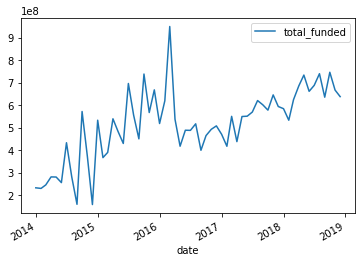

In [228]:
ts.plot('date', 'total_funded')

In [229]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [230]:
# percent of loans fully paid vs. charged off per month
ts['percent_fully_paid'] = ts['date'].apply(lambda x: len(df[(df['issue_d'] == x) & (df['loan_status'] == 'Fully Paid')])
                                           / (len(df[(df['issue_d'] == x) & (df['loan_status'] == 'Charged Off')]) + 
                                              len(df[(df['issue_d'] == x) & (df['loan_status'] == 'Fully Paid')]))
                                             )
ts.head()

,date,total_funded,percent_fully_paid
0,2015-12-01,667910550.0,0.791395
1,2015-11-01,567247325.0,0.801264
2,2015-10-01,738221400.0,0.809519
3,2015-09-01,450246800.0,0.794036
4,2015-08-01,555331400.0,0.800038


In [231]:
ts.sort_values('date')

,date,total_funded,percent_fully_paid
41,2014-01-01,232715325.0,0.841360
40,2014-02-01,230086925.0,0.833936
39,2014-03-01,245762800.0,0.830246
38,2014-04-01,281179575.0,0.817301
37,2014-05-01,280661600.0,0.816499
36,2014-06-01,255898875.0,0.806932
35,2014-07-01,433044725.0,0.812176
34,2014-08-01,281426975.0,0.811844
33,2014-09-01,159444175.0,0.811345
32,2014-10-01,571760975.0,0.803088


<AxesSubplot:xlabel='date'>

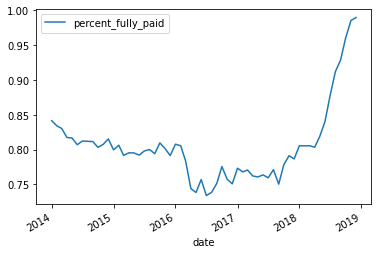

In [232]:
ts.plot('date', 'percent_fully_paid')

(array([0.34568185, 0.49640215, 0.        , 0.49053762, 0.        ,
        0.22437401, 0.07880702, 0.        , 0.02275781, 0.0081062 ]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

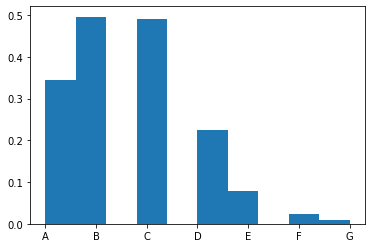

In [233]:
# grade distribution before/after 2016
plt.hist(sorted(df['grade'][df['issue_d'] >= pd.to_datetime(['01-01-2016'])[0]]), density=True)

(array([0.2777524 , 0.45564803, 0.        , 0.47491285, 0.        ,
        0.26811365, 0.13975683, 0.        , 0.04070711, 0.0097758 ]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

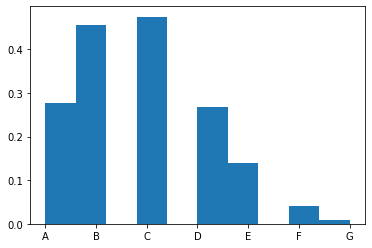

In [234]:
plt.hist(sorted(df['grade'][df['issue_d'] < pd.to_datetime(['01-01-2016'])[0]]), density=True)

# Hoang - EDA

In [235]:
import seaborn as sns

In [236]:
df_copy = df.copy(deep=False)

Text(0.5, 1.0, 'Percent of null rows in a column')

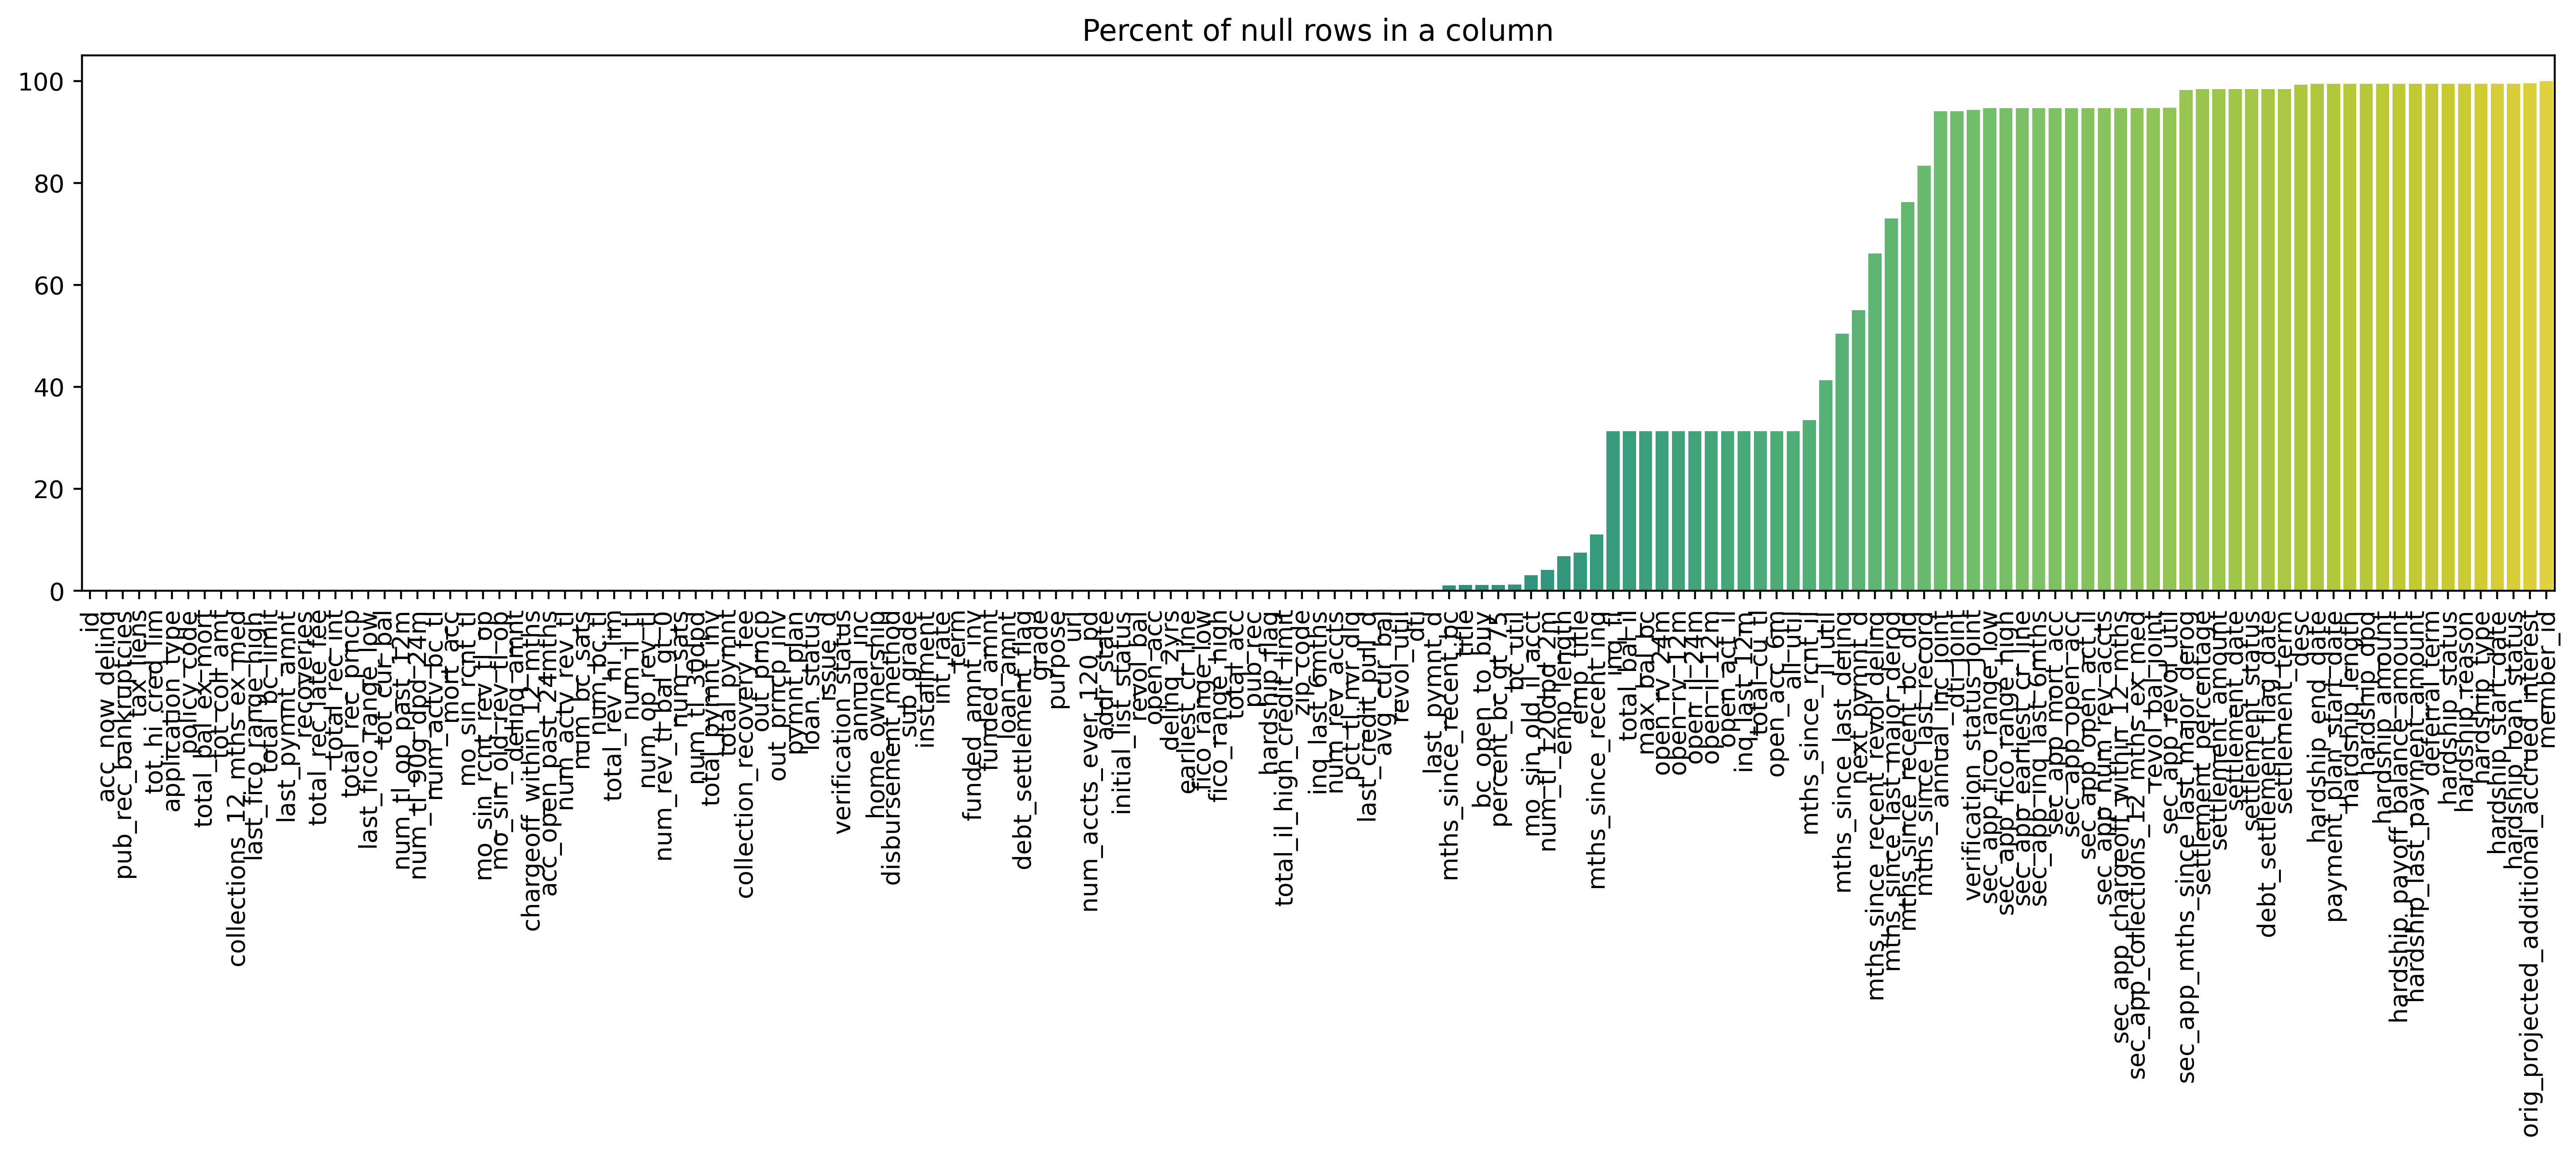

In [237]:
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((df_copy.isnull().sum()/len(df_copy))*100).sort_values(), x=((df_copy.isnull().sum()/len(df_copy))*100).sort_values().index, palette='viridis')
plt.xticks(rotation=90)
plt.title("Percent of null rows in a column")

In [238]:
keep = df.columns[((df_copy.isnull().sum()/len(df_copy))*100 < 20)].to_list()
keep # list of columns to be kept

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

In [239]:
df_copy = df_copy[keep]

1. Analyze the proportion of people that failed to pay back had other loans.

In [240]:
df_bad_loan = df_copy[(df_copy['loan_status'] != 'Fully Paid') & (df_copy['loan_status'] != 'Current')]

In [241]:
df_bad_loan['derogatory_bankruptcy_total'] = df_bad_loan['pub_rec'] + df_bad_loan['pub_rec_bankruptcies']

/var/folders/5p/n3sbx2sd4z9d26_4552pvds00000gn/T/ipykernel_9707/2176785542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bad_loan['derogatory_bankruptcy_total'] = df_bad_loan['pub_rec'] + df_bad_loan['pub_rec_bankruptcies']


In [242]:
# Get the total number of ids
total_bad_loan_id = len(df_bad_loan)
total_bad_loan_id

267509

In [243]:
# Get the number of ids with zero other loan using derogatory and bankruptcy records.
df_zero_other_loan = df_bad_loan.loc[df_bad_loan['derogatory_bankruptcy_total'] == 0]
count_zero_other_loan = len(df_zero_other_loan)
count_zero_other_loan

212736

In [244]:
percentage_zero_other_loan = count_zero_other_loan / total_bad_loan_id * 100

In [245]:
labels = ['No other loan', 'Has other loan']
percentages = [percentage_zero_other_loan, 100 - percentage_zero_other_loan]

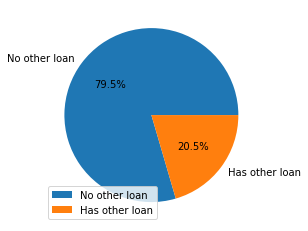

In [246]:
plt.pie(percentages, labels=labels, autopct='%1.1f%%')
plt.legend(labels, loc=3)
plt.show()

2. Analyze correlation between people having other loans and the inter

In [247]:
df_has_other_loan = df_bad_loan.loc[df_bad_loan['derogatory_bankruptcy_total'] != 0]

In [291]:
# Correlation of 'derogatory_bankruptcy_total' compared to others among people having other loans
df_corr = df_bad_loan.corr()['derogatory_bankruptcy_total'].sort_values().drop(['derogatory_bankruptcy_total', 'pub_rec', 'pub_rec_bankruptcies'])
top_pos_corr = df_corr.tail(20)
top_neg_corr = df_corr.head(10)

<AxesSubplot:>

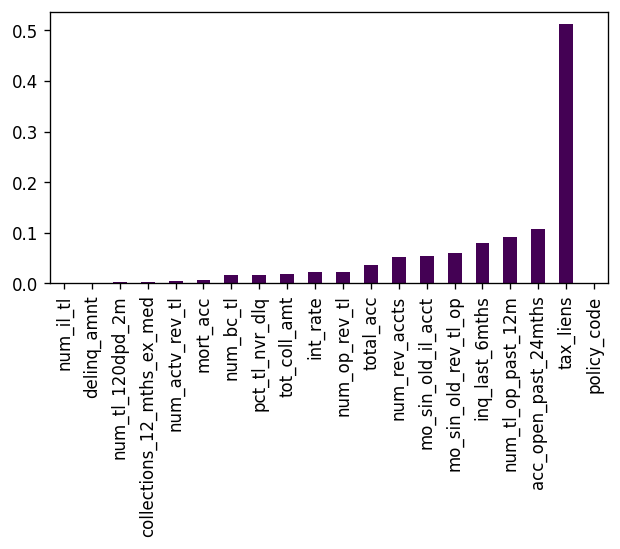

In [292]:
plt.figure(figsize=(6,3),dpi=120)
top_pos_corr.plot(kind='bar', cmap='viridis')

<AxesSubplot:>

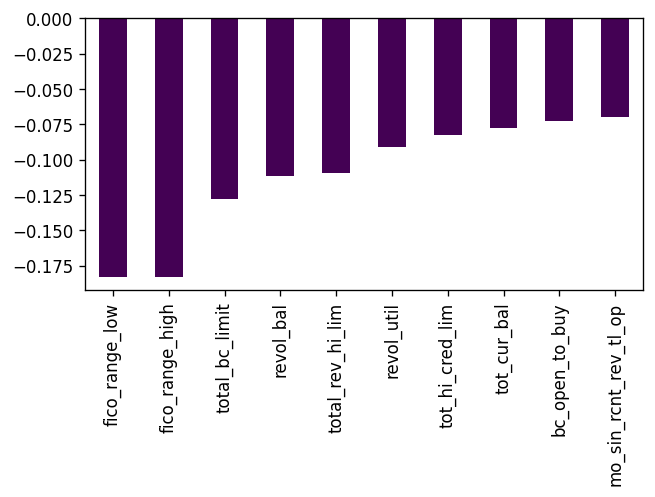

In [293]:
plt.figure(figsize=(6,3),dpi=120)
top_neg_corr.plot(kind='bar', cmap='viridis')

In [297]:
# Correlation of 'derogatory_bankruptcy_total' compared to others among people having other loans
df_corr = df_has_other_loan.corr()['derogatory_bankruptcy_total'].sort_values().drop(['derogatory_bankruptcy_total', 'pub_rec', 'pub_rec_bankruptcies'])
top_pos_corr = df_corr.tail(20)
top_neg_corr = df_corr.head(10)

<AxesSubplot:>

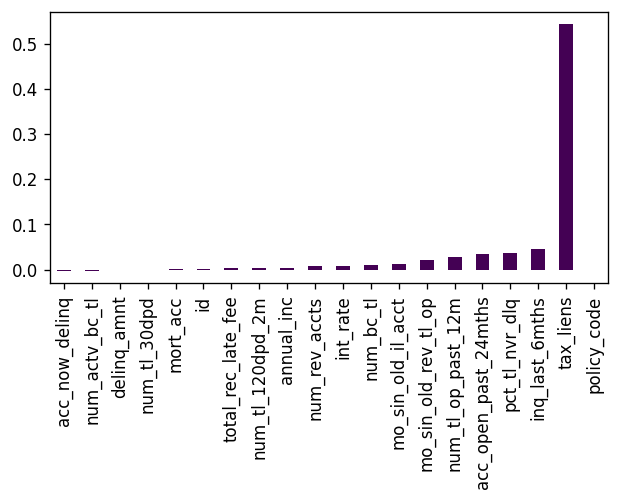

In [298]:
plt.figure(figsize=(6,3),dpi=120)
top_pos_corr.plot(kind='bar', cmap='viridis')

<AxesSubplot:>

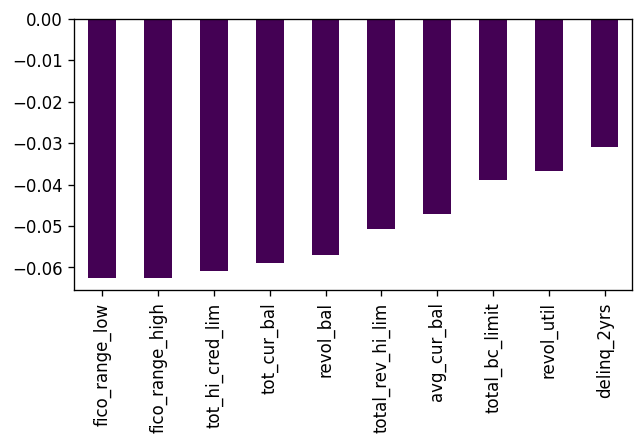

In [299]:
plt.figure(figsize=(6,3),dpi=120)
top_neg_corr.plot(kind='bar', cmap='viridis')